In [1]:
import pandas as pd

In [44]:
# #rsids to hg19 coordinates
# rsid_map = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/convert_hg38_to_hg19/hg38_rsids2.bed", sep="\t", header=None)
# rsid_map["rsid"] = rsid_map[0] + "_" + rsid_map[2].astype(str) + "_" + rsid_map[3] + "_" + rsid_map[4] 
# rsid_map_dict = {}
# for i,r in rsid_map.iterrows():
#     rsid_map_dict[r[9]] = r["rsid"]

In [45]:
caqtls = pd.read_csv("Eu.new.CaQTLS.tsv", sep="\t", header=0)
caqtls = caqtls[caqtls["IsUsed"] & caqtls["Inside_Peak"]==1]


In [46]:
afrs = pd.read_csv("Afr.CaQTLS.new.tsv", sep="\t", header=0)
afrs = afrs[afrs["IsUsed"]]

In [47]:
afrs.head() # hg38

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed,pval,beta,enformer.encsr000emt.variantscore.sad,...,chrombpnet.encsr095qnb.variantscore.jsd,chrombpnet.encsr095qnb.variantscore.csr,chrombpnet.encsr095qnb.variantscore.pval,dbsnp_rsid,region,snp,distance,se,abs_beta,id_hg19
2,chr1,870176,T,A,1_870176_T_A,False,True,0.071532,-0.250142,-0.000139,...,0.019025,0.001262,0.048612,rs72631880,1:869800:870282,1_870176_T_A,375,0.137133,0.250142,chr1_805556_T_A
4,chr1,905373,C,T,1_905373_T_C,False,True,0.188152,-0.130176,-0.000071,...,0.025277,0.003640,0.018781,rs4970382,1:904938:905544,1_905373_T_C,434,0.098145,0.130176,chr1_840753_T_C
8,chr1,906870,A,G,1_906870_A_G,False,True,0.151325,-0.335979,-0.000669,...,-0.048693,0.024808,0.002238,rs148658266,1:906596:907043,1_906870_A_G,273,0.232118,0.335979,chr1_842250_A_G
9,chr1,906982,C,T,1_906982_C_T,True,True,0.000005,-0.520262,-0.000453,...,-0.029040,0.009527,0.007020,rs28540380,1:906596:907043,1_906982_C_T,385,0.106740,0.520262,chr1_842362_C_T
12,chr1,921203,G,A,1_921203_G_A,True,True,0.000007,0.905971,0.000342,...,0.085904,0.025396,0.002171,rs141671872,1:921132:921332,1_921203_G_A,70,0.189412,0.905971,chr1_856583_G_A


In [48]:
caqtls.head() # hg19

,chr,Pos,Ref,Alt,RsID,Peak,AF,Inside_Peak,P_Lead,Beta,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed,DNASE_SAD,DNASE_SAR,IsUsed
2,chr1,565286,C,T,rs1578391,7,0.59780,1,0.998561,0.886884,...,0.000022,0.379356,-0.045242,-0.016605,5.337650e-05,0.505239,-0.001945,0.000008,0.000011,True
3,chr1,569204,T,C,rs112660509,8,0.40125,1,0.477613,0.251458,...,0.000155,0.191231,0.027531,0.017267,2.734630e-04,0.580367,0.001667,0.000026,0.000036,True
6,chr1,726944,C,G,rs3131979,14,0.74175,1,0.953905,-0.079065,...,0.000001,0.802258,0.026410,0.010944,2.107834e-05,0.580367,-0.001038,0.000100,0.000133,True
7,chr1,752721,A,G,rs3131972,17,0.84500,1,0.890193,-0.011374,...,0.012412,0.003650,0.338401,0.047837,1.246855e-02,0.333333,-0.344077,0.002493,0.003319,True
8,chr1,755940,C,T,rs3115857,18,0.59380,1,0.302008,-0.077224,...,0.000004,0.674640,-0.026630,-0.011550,2.854755e-07,0.666667,-0.007762,0.000022,0.000029,True


In [7]:
#afrs["rsid1"] = afrs["dbsnp_rsid"].map(rsid_map_dict)

In [8]:
#afrs.head()

In [49]:
afrs[["chr_hg19", "pos_hg19", "ref_hg19", "alt_hg19"]] = afrs["id_hg19"].str.split("_", expand=True)

In [50]:
afrs.head()
afrs["pos_hg19"] = afrs["pos_hg19"].astype(int)

In [51]:
caqtls.head()

,chr,Pos,Ref,Alt,RsID,Peak,AF,Inside_Peak,P_Lead,Beta,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed,DNASE_SAD,DNASE_SAR,IsUsed
2,chr1,565286,C,T,rs1578391,7,0.59780,1,0.998561,0.886884,...,0.000022,0.379356,-0.045242,-0.016605,5.337650e-05,0.505239,-0.001945,0.000008,0.000011,True
3,chr1,569204,T,C,rs112660509,8,0.40125,1,0.477613,0.251458,...,0.000155,0.191231,0.027531,0.017267,2.734630e-04,0.580367,0.001667,0.000026,0.000036,True
6,chr1,726944,C,G,rs3131979,14,0.74175,1,0.953905,-0.079065,...,0.000001,0.802258,0.026410,0.010944,2.107834e-05,0.580367,-0.001038,0.000100,0.000133,True
7,chr1,752721,A,G,rs3131972,17,0.84500,1,0.890193,-0.011374,...,0.012412,0.003650,0.338401,0.047837,1.246855e-02,0.333333,-0.344077,0.002493,0.003319,True
8,chr1,755940,C,T,rs3115857,18,0.59380,1,0.302008,-0.077224,...,0.000004,0.674640,-0.026630,-0.011550,2.854755e-07,0.666667,-0.007762,0.000022,0.000029,True


In [52]:
df1 = afrs.merge(caqtls, right_on=["chr", "Pos", "Ref", "Alt"], left_on=["chr_hg19", "pos_hg19", "ref_hg19", "alt_hg19"], how="left" )

In [58]:
import numpy as np
sum(~np.isnan(df1["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]))

19353

In [59]:
df1.shape

(109646, 79)

In [55]:
df2 = afrs.merge(caqtls, right_on=["chr", "Pos", "Alt", "Ref"], left_on=["chr_hg19", "pos_hg19", "ref_hg19", "alt_hg19"], how="left" )

In [61]:
sum(~np.isnan(df2["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]))

7305

In [62]:
df = pd.concat([df1[~np.isnan(df1["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"])],df2[~np.isnan(df2["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"])]])


In [64]:
df.shape

(26658, 79)

In [66]:
rsid_int = set(caqtls[caqtls["RsID"].isin(afrs["dbsnp_rsid"])]["RsID"].values)

In [67]:
len(rsid_int)

26658

In [68]:
df.shape

(26658, 79)

In [71]:
caqtls_ols=pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl/rasqual_atac_1M", sep='\t', header=None)

In [74]:
len(set(caqtls_ols[caqtls_ols[1].isin( afrs["dbsnp_rsid"])][1]))

2087

In [75]:
len(set(caqtls_ols[caqtls_ols[1].isin( caqtls["RsID"])][1]))

4435

In [139]:
df.head()

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed_x,pval,beta,enformer.encsr000emt.variantscore.sad,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,enformer_recomputed_y,DNASE_SAD,DNASE_SAR,IsUsed_y
0,chr1,870176,T,A,1_870176_T_A,False,True,0.071532,-0.250142,-0.000139,...,0.000139,0.195813,-0.000459,-0.008914,0.000072,0.505239,-0.002396,-0.000139,-0.000184,True
1,chr1,905373,C,T,1_905373_T_C,False,True,0.188152,-0.130176,-0.000071,...,0.001306,0.039847,0.072689,0.019863,0.001272,0.333333,0.015009,-0.000071,-0.000095,True
3,chr1,906982,C,T,1_906982_C_T,True,True,0.000005,-0.520262,-0.000453,...,0.001456,0.033359,-0.079933,-0.026171,0.001060,0.382899,0.176561,-0.000453,-0.000604,True
30,chr1,1020217,G,T,1_1020217_G_T,False,True,0.975842,-0.002104,0.000293,...,0.000197,0.152159,-0.000160,-0.012468,0.000081,0.580367,0.000754,0.000293,0.000344,True
66,chr1,1137871,C,A,1_1137871_C_A,False,True,0.493873,-0.103324,-0.000020,...,0.000031,0.368320,0.018878,0.010569,0.000123,0.439836,-0.000308,-0.000020,-0.000026,True


In [142]:
df.columns

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed_x', 'pval', 'beta', 'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar', 'enformer_recomputed_x',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrombpnet.encsr000emt

In [77]:
sum(df["Log10_BF"]<-1)

14843

In [78]:
sum(df["Log10_BF"]>3)

4170

In [148]:
threshold = 1 / (10**(6))

df[(df["Log10_BF"]<-1) & (df["label"]==1)].drop_duplicates().shape

(69, 79)

In [149]:
threshold = 1 / (10**(6))
df[(df["Log10_BF"]>3) & (df["label"]==1)].drop_duplicates().shape

(2800, 79)

In [136]:
df[(df["Log10_BF"]>3) & (df["pval"]>1e-3)].drop_duplicates().shape

(1370, 79)

In [143]:
df[(df["Log10_BF"]>3) & (df["pval"]>1e-3)].drop_duplicates()[["chr_hg19", "pos_hg19", "ref_hg19", "alt_hg19","chr_hg38", "pos_hg38", "allele1", "allele2", "dbsnp_rsid"]]



,chr_hg19,pos_hg19,ref_hg19,alt_hg19,chr_hg38,pos_hg38,allele1,allele2,dbsnp_rsid
208,chr1,3839080,A,G,chr1,3922516,A,G,rs36197555
684,chr1,15930251,T,G,chr1,15603756,T,G,rs72645889
849,chr1,19986341,A,T,chr1,19659848,A,T,rs12747702
1040,chr1,25021037,A,C,chr1,24694546,A,C,rs2885174
1259,chr1,28575121,T,G,chr1,28248610,G,T,rs530426
...,...,...,...,...,...,...,...,...,...
108106,chr22,18484205,C,G,chr22,18001439,C,G,rs5992955
109267,chr22,43157308,G,C,chr22,42761302,G,C,rs6002949
109272,chr22,43165866,T,C,chr22,42769860,T,C,rs6002950
109275,chr22,43259541,C,A,chr22,42863535,C,A,rs5751390


In [88]:
sum(df["pval"]<threshold)

2787

In [144]:
sum(df["pval"]>1e-3)

23221

In [92]:
afrs.shape

(109646, 51)

In [95]:
caqtls.shape

(156730, 28)

(1370, 79)


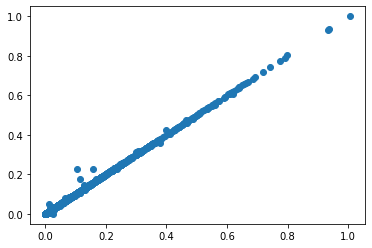

In [130]:
import matplotlib.pyplot as plt
tt = df[(df["Log10_BF"]>3) & (df["pval"]>1e-3)].drop_duplicates()
print(tt.shape)
plt.scatter(abs(tt["enformer_recomputed_y"]),abs(tt["enformer_recomputed_x"]))

In [131]:
np.savetxt('test_rsids.txt', tt['dbsnp_rsid'].values, fmt='%s')

In [105]:
tt.columns

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed_x', 'pval', 'beta', 'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar', 'enformer_recomputed_x',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
       'chrombpnet.encsr000emt

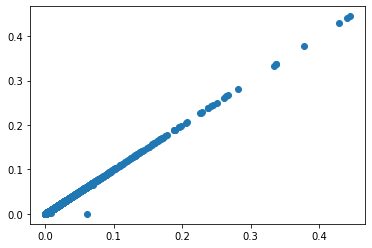

In [106]:
plt.scatter(abs(tt["chrombpnet.encsr637xsc.variantscore.csr"]),abs(tt["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))

Text(0, 0.5, 'ChromBPNet predictions')

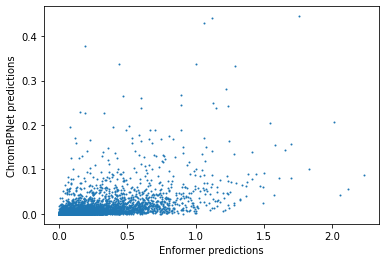

In [114]:
plt.scatter(abs(tt["enformer_recomputed_y"]),abs(tt["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
plt.xlabel("Enformer predictions")
plt.ylabel("ChromBPNet predictions")

Text(0, 0.5, 'ChromBPNet predictions')

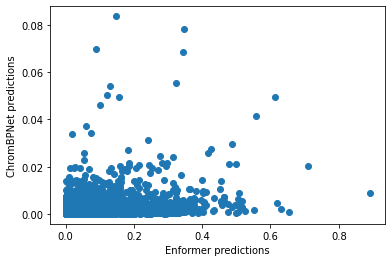

In [117]:
tt = df[df["Log10_BF"]<-1]
plt.scatter(abs(tt["enformer_recomputed_y"]),abs(tt["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
plt.xlabel("Enformer predictions")
plt.ylabel("ChromBPNet predictions")

In [ ]:
colors=np.array(['b'])
colors = 'r'
plt.scatter(abs(tt["enformer_recomputed_y"]),abs(tt["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
plt.xlabel("Enformer predictions")
plt.ylabel("ChromBPNet predictions")

<AxesSubplot:>

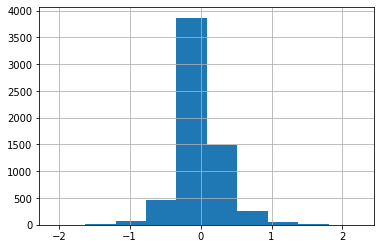

In [108]:
tt["enformer_recomputed_y"].hist()